In [1]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

Using gpu device 0: Tesla K40c (CNMeM is disabled, cuDNN 4007)


### THEANO
Theano is a open-source numerical computation library for Python; primarily developed by a machine learning group at the Université de Montréal (leaded by Yoshua Bengio). The library has been in use since 2008 with current version being 0.8.2.
And yes, supports both GPU and CPU!!

## Pilot

In [2]:
import theano.tensor as T

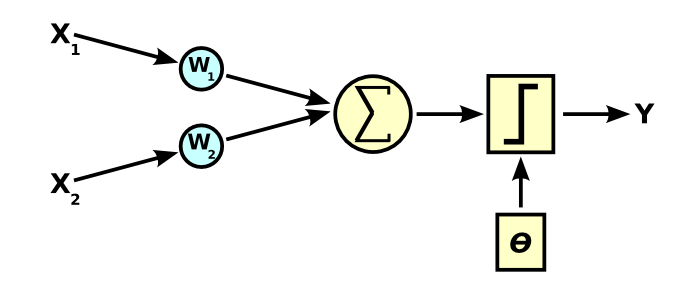

In [23]:
Image("./images/675px-Computer.Science.AI.Neuron.svg.png")

In [ ]:
def get_neuron(x):
    
    #output = sigmoid(W_t.x + b)
  
    W = theano.shared(np.array([1.,1.]), 
                      name="Weight")
    b = theano.shared(np.array(0.,), 
                      name="bias")

    prod = T.dot(W,x) + b
    sigmoid = 1/(1 + T.exp(-prod))    
    
    return sigmoid

In [4]:
x = T.vector(name = "input")
neuron = get_neuron(x)

The output file is available at ./image.png


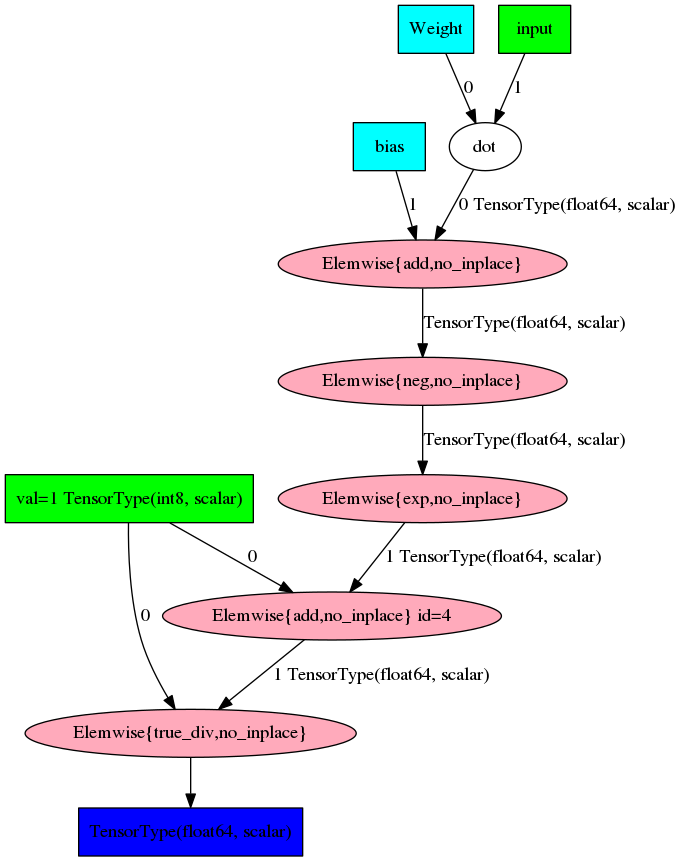

In [5]:
#Making it visual!!
theano.printing.pydotprint(neuron, outfile="./images/image.png", var_with_name_simple=True)  
Image("/images/image.png")

In [6]:
#lets compile!!! 
neuron_new = theano.function(inputs=[x],outputs=neuron)

The output file is available at ./image.png


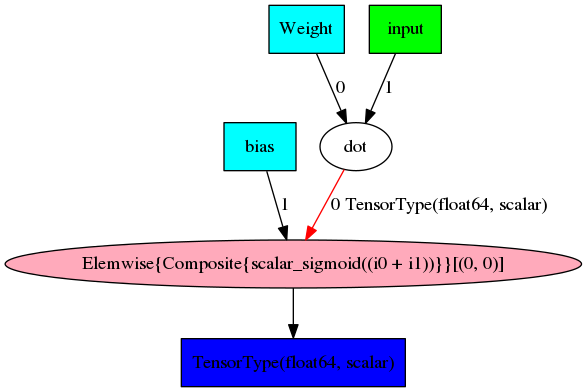

In [7]:
#look at the reduced graph!! Under-the-hood graph optimizaton!!
theano.printing.pydotprint(neuron_new, outfile="/images/image.png", var_with_name_simple=True)  
Image("/images/image.png")

##### Not a picture person person?? we can pretty print the graph too!!!

In [15]:
print "BEFORE COMPILING Theano function"
theano.printing.debugprint(neuron)
print "--------------------------------"
print "AFTER COMPILING Theano function"
theano.printing.debugprint(neuron_new)

BEFORE COMPILING Theano function
Elemwise{true_div,no_inplace} [id A] ''   
 |TensorConstant{1} [id B]
 |Elemwise{add,no_inplace} [id C] ''   
   |TensorConstant{1} [id B]
   |Elemwise{exp,no_inplace} [id D] ''   
     |Elemwise{neg,no_inplace} [id E] ''   
       |Elemwise{add,no_inplace} [id F] ''   
         |dot [id G] ''   
         | |Weight [id H]
         | |input [id I]
         |bias [id J]
--------------------------------
AFTER COMPILING Theano function
Elemwise{Composite{scalar_sigmoid((i0 + i1))}}[(0, 0)] [id A] ''   1
 |dot [id B] ''   0
 | |Weight [id C]
 | |input [id D]
 |bias [id E]


### Let's wrap it up in a Class for reusability!
And do back propogation!!

In [8]:
class Neuron(object):
    def __init__(self): #class contructor
        
        #self equals this (in Java)!!     
        self.x = T.vector(name = "input_var") 
        self.y = T.scalar(name = "output_var")
        
        self.W = theano.shared(np.array([1.,1.]), 
                          name="Weight")
        self.b = theano.shared(np.array(0.,), 
                          name="bias")

        prod = T.dot(self.W,self.x) + self.b
        
        self.output = 1/(1 + T.exp(-prod))
        
        self.loss = T.square(self.y-self.output)        

In [9]:
neuron = Neuron() #instantiate class object

In [10]:
#Calculate gradients.... Thats where magic happens!!!
grad_W, grad_b = T.grad(neuron.loss,[neuron.W,neuron.b])

In [11]:
learning_rate = 0.11

#define update rules
update = [(neuron.W , neuron.W - learning_rate*grad_W), 
          (neuron.b, neuron.b -  learning_rate*grad_b) ]

In [12]:
#compile theano function
train_neuron = theano.function(inputs = [neuron.x, neuron.y],
                               outputs = [neuron.output, neuron.loss],
                               updates = update
                              )

In [13]:
#pretty simple dummy datum!!
x_data = [-1.,-1.]
y_data = 0

In [14]:
num_epochs = 100
for epoch in range(num_epochs):
    y_hat, loss = train_neuron(x_data , y_data)
    if epoch%10==0:
        print "epoch:", epoch/10, "target:", y_hat, "loss:",loss

epoch: 0 target: 0.119202922022 loss: 0.0142093366186
epoch: 1 target: 0.11126281918 loss: 0.012379414932
epoch: 2 target: 0.104629504732 loss: 0.0109473332606
epoch: 3 target: 0.0989889840761 loss: 0.00979881896842
epoch: 4 target: 0.0941220442637 loss: 0.00885895921639
epoch: 5 target: 0.0898707691783 loss: 0.00807675515269
epoch: 6 target: 0.0861183488728 loss: 0.00741637001257
epoch: 7 target: 0.082776403547 loss: 0.00685193298418
epoch: 8 target: 0.0797767454017 loss: 0.00636432910689
epoch: 9 target: 0.0770658621328 loss: 0.00593914710628


### Want paramter values after every epoch!!
Thats why we have parameters as shared variables!!

In [17]:
neuron.W.get_value()

array([ 1.17268976,  1.17268976])

### Let's get started...!!